In [2]:
import featuretools as ft
import pandas as pd
import numpy as np
import sqlite3

In [3]:
## Fetching data
#Connecting to database
path = "C:\\Users\\Kuba\\Desktop\\Python\\semestr4\\BigData\\projekt\\"  #Insert path here
database = path + 'database.sqlite'
conn = sqlite3.connect(database)

#Defining the number of jobs to be run in parallel during grid search
n_jobs = 1 #Insert number of parallel jobs here

matches_df = pd.read_sql("""SELECT * from MATCH""", conn)
teams_df = pd.read_sql("""SELECT * from TEAM""", conn)
player_attributes_df = pd.read_sql("""SELECT * from PLAYER_ATTRIBUTES""", conn)

matches_df['date'] = pd.to_datetime(matches_df['date'], format='%Y-%m-%d 00:00:00')

In [4]:
matches_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
player_attributes_df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [6]:
home_players = ["home_player_" + str(x) for x in range(1, 12)]
away_players = ["away_player_" + str(x) for x in range(1, 12)]

betting_columns = ["B365H", "B365D", "B365A"]

matches_kept_columns = ["id", "date", "home_team_api_id", "away_team_api_id", "home_team_goal", "away_team_goal"]
matches_kept_columns = matches_kept_columns + home_players
matches_kept_columns = matches_kept_columns + away_players
matches_kept_columns = matches_kept_columns + betting_columns

matches_df = matches_df[matches_kept_columns]

In [7]:
matches_df

,id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A
0,1,2008-08-17,9987,9993,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00
1,2,2008-08-16,10000,9994,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60
2,3,2008-08-16,9984,8635,0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75
3,4,2008-08-17,9991,9998,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50
4,5,2008-08-16,7947,9985,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,2015-09-22,10190,10191,1,0,42231.0,678384.0,95220.0,638592.0,...,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,NaN,NaN,NaN
25975,25976,2015-09-23,9824,10199,1,2,33272.0,41621.0,25813.0,257845.0,...,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,NaN,NaN,NaN
25976,25977,2015-09-23,9956,10179,2,0,157856.0,274779.0,177689.0,294256.0,...,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,NaN,NaN,NaN
25977,25978,2015-09-22,7896,10243,0,0,NaN,8881.0,173534.0,39646.0,...,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,NaN,NaN,NaN


In [8]:
player_attributes_df["overall_rating"] = player_attributes_df["overall_rating"].interpolate(method="linear", limit_direction="forward")

In [9]:
matches_df['goal_difference'] = matches_df['home_team_goal'] - matches_df['away_team_goal']
matches_df['home_status'] = 'D'
matches_df['home_status'] = np.where(matches_df['goal_difference'] > 0, 'W', matches_df['home_status'])
matches_df['home_status'] = np.where(matches_df['goal_difference'] < 0, 'L', matches_df['home_status'])

for player in home_players:
    matches_df = pd.merge(matches_df, player_attributes_df[["id", "overall_rating"]], left_on=[player], right_on=["id"], suffixes=["", "_" + player])

for player in away_players:
    matches_df = pd.merge(matches_df, player_attributes_df[["id", "overall_rating"]], left_on=[player], right_on=["id"], suffixes=["", "_" + player])


matches_df = matches_df.rename(columns={"overall_rating": "overall_rating_home_player_1"})

# matches_df = matches_df[ matches_df[['overall_rating_' + p for p in home_players]].interpolate(method="linear", limit_direction="forward")]
# matches_df = matches_df[ matches_df[['overall_rating_' + p for p in away_players]].interpolate(method="linear", limit_direction="forward")]
for p in home_players:
    matches_df['overall_rating_'+p] =  matches_df['overall_rating_'+p].interpolate(method="linear", limit_direction="forward")
    matches_df[p] =  matches_df[p].interpolate(method="linear", limit_direction="forward")

for p in away_players:
    matches_df['overall_rating_'+p] =  matches_df['overall_rating_'+p].interpolate(method="linear", limit_direction="forward")
    matches_df[p] =  matches_df[p].interpolate(method="linear", limit_direction="forward")



matches_df['overall_rating_home'] = matches_df[['overall_rating_' + p for p in home_players]].sum(axis=1)
matches_df['overall_rating_away'] = matches_df[['overall_rating_' + p for p in away_players]].sum(axis=1)
matches_df['overall_rating_difference'] = matches_df['overall_rating_home'] - matches_df['overall_rating_away']

matches_df['min_overall_rating_home'] = matches_df[['overall_rating_' + p for p in home_players]].min(axis=1)
matches_df['min_overall_rating_away'] = matches_df[['overall_rating_' + p for p in away_players]].min(axis=1)

matches_df['max_overall_rating_home'] = matches_df[['overall_rating_' + p for p in home_players]].max(axis=1)
matches_df['max_overall_rating_away'] = matches_df[['overall_rating_' + p for p in away_players]].max(axis=1)

matches_df['mean_overall_rating_home'] = matches_df[['overall_rating_' + p for p in home_players]].mean(axis=1)
matches_df['mean_overall_rating_away'] = matches_df[['overall_rating_' + p for p in away_players]].mean(axis=1)

matches_df['std_overall_rating_home'] = matches_df[['overall_rating_' + p for p in home_players]].std(axis=1)
matches_df['std_overall_rating_away'] = matches_df[['overall_rating_' + p for p in away_players]].std(axis=1)

In [10]:
for c in matches_df.columns:
    if '_player_' in c:
        matches_df = matches_df.drop(c, axis=1)

In [11]:
matches_df

,id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,goal_difference,...,overall_rating_away,overall_rating_difference,min_overall_rating_home,min_overall_rating_away,max_overall_rating_home,max_overall_rating_away,mean_overall_rating_home,mean_overall_rating_away,std_overall_rating_home,std_overall_rating_away
0,8227,2010-01-30,8177,9911,0,0,1.91,3.40,4.00,0,...,783.0,-37.0,60.0,63.0,77.0,92.0,67.818182,71.181818,4.750120,8.400216
1,8152,2009-11-22,9790,9911,0,1,1.36,4.75,8.50,-1,...,790.0,-18.0,58.0,63.0,92.0,92.0,70.181818,71.818182,8.576925,8.553574
2,8109,2008-10-26,10269,9911,2,0,1.44,4.20,7.50,2,...,785.0,-5.0,62.0,62.0,76.0,92.0,70.909091,71.363636,4.548726,8.743829
3,8088,2008-10-04,9823,9911,3,3,1.25,5.50,12.00,0,...,783.0,-28.5,58.0,62.0,83.0,92.0,68.590909,71.181818,7.364843,8.727178
4,8010,2008-08-30,10189,9911,1,0,1.40,4.33,8.50,1,...,770.0,-37.0,60.0,60.0,74.0,92.0,66.636364,70.000000,4.129715,9.241212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,20738,2012-08-19,9938,8284,3,0,1.44,4.20,7.50,3,...,780.0,-8.0,62.0,67.0,84.0,79.0,70.181818,70.909091,6.508735,3.910359
6538,20577,2011-08-20,9938,8457,0,1,1.70,3.50,5.25,-1,...,720.0,35.0,57.0,48.0,84.0,72.0,68.636364,65.454545,7.103136,7.353416
6539,17958,2010-02-07,7841,6421,2,0,1.95,3.20,3.75,2,...,779.0,-27.0,62.0,62.0,77.0,82.0,68.363636,70.818182,5.182137,5.844967
6540,13834,2009-08-23,8611,10219,2,1,1.20,5.50,12.00,1,...,755.0,-8.0,56.0,59.0,78.0,74.0,67.909091,68.636364,6.204104,5.334280


In [12]:
ct_home_matches = pd.DataFrame()
ct_away_matches = pd.DataFrame()

ct_matches = pd.DataFrame()

# Trick to exclude current match from statistics and do not biais predictions
ct_home_matches['time'] = matches_df['date'] - pd.Timedelta(hours=1)
ct_home_matches['instance_id'] = matches_df['home_team_api_id']
ct_home_matches['label'] = (ct_home_matches['instance_id'] == ct_home_matches['instance_id'])

# Trick to exclude current match from statistics and do not biais predictions
ct_away_matches['time'] = matches_df['date'] - pd.Timedelta(hours=1)
ct_away_matches['instance_id'] = matches_df['away_team_api_id']
ct_away_matches['label'] = (ct_away_matches['instance_id'] == ct_away_matches['instance_id'])

ct_matches = ct_home_matches.append(ct_away_matches)

C:\Users\Kuba\AppData\Local\Temp\ipykernel_17924\2672351310.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ct_matches = ct_home_matches.append(ct_away_matches)


In [13]:
ct_matches

,time,instance_id,label
0,2010-01-29 23:00:00,8177,True
1,2009-11-21 23:00:00,9790,True
2,2008-10-25 23:00:00,10269,True
3,2008-10-03 23:00:00,9823,True
4,2008-08-29 23:00:00,10189,True
...,...,...,...
6537,2012-08-18 23:00:00,8284,True
6538,2011-08-19 23:00:00,8457,True
6539,2010-02-06 23:00:00,6421,True
6540,2009-08-22 23:00:00,10219,True


In [14]:
es = ft.EntitySet("entityset")

es.entity_from_dataframe(entity_id="home_matches",
                        index="id",
                        time_index="date",
                        dataframe=matches_df,
                        variable_types={"home_team_api_id": ft.variable_types.Categorical,
                                              "away_team_api_id": ft.variable_types.Categorical,
                                              "home_status": ft.variable_types.Categorical,
                                              "home_team_goal":     ft.variable_types.Numeric,
                                              "away_team_goal":     ft.variable_types.Numeric})

es.entity_from_dataframe(entity_id="away_matches",
                        index="id",
                        time_index="date",
                        dataframe=matches_df,
                        variable_types={"home_team_api_id": ft.variable_types.Categorical,
                                              "away_team_api_id": ft.variable_types.Categorical,
                                              "home_status": ft.variable_types.Categorical,
                                              "home_team_goal":     ft.variable_types.Numeric,
                                              "away_team_goal":     ft.variable_types.Numeric})

es.entity_from_dataframe(entity_id="teams",
                         index="team_api_id",
                         dataframe=teams_df)

es.add_last_time_indexes()

new_relationship = ft.Relationship(es["teams"]["team_api_id"],
                                   es["home_matches"]["home_team_api_id"])
es = es.add_relationship(new_relationship)

new_relationship = ft.Relationship(es["teams"]["team_api_id"],
                                   es["away_matches"]["away_team_api_id"])
es = es.add_relationship(new_relationship)

feature_matrix, features_defs = ft.dfs(entities=es,
                                       entityset=es,
                                       cutoff_time=ct_matches,
                                       cutoff_time_in_index=True,
                                       training_window='60 days',
                                       max_depth=3,
                                       target_entity="teams",
                                       verbose=True
                                      )

print(feature_matrix)

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\entityset\entityset.py:888: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lti_df = pd.Series()
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\entityset\entityset.py:888: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lti_df = pd.Series()
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\entityset\entityset.py:888: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lti_df = pd.Series()
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\enti

Built 234 features
Elapsed: 00:00 | Progress:   0%|          

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 00:00 | Progress:   0%|          

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 00:52 | Progress:  33%|███▎      

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 01:04 | Progress:  41%|████      

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 01:33 | Progress:  57%|█████▋    

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 01:34 | Progress:  57%|█████▋    

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 01:34 | Progress:  58%|█████▊    

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 01:36 | Progress:  59%|█████▉    

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 01:57 | Progress:  70%|███████   

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:17 | Progress:  79%|███████▉  

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:17 | Progress:  79%|███████▉  

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:18 | Progress:  79%|███████▉  

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:18 | Progress:  79%|███████▉  

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:19 | Progress:  79%|███████▉  

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:19 | Progress:  80%|███████▉  

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:30 | Progress:  84%|████████▍ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:30 | Progress:  84%|████████▍ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:33 | Progress:  85%|████████▌ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:36 | Progress:  86%|████████▌ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:39 | Progress:  87%|████████▋ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:43 | Progress:  89%|████████▊ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:44 | Progress:  89%|████████▊ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:44 | Progress:  89%|████████▉ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:45 | Progress:  89%|████████▉ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:45 | Progress:  89%|████████▉ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:49 | Progress:  90%|█████████ 

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 02:56 | Progress:  92%|█████████▏

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:02 | Progress:  93%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:02 | Progress:  93%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:02 | Progress:  93%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:02 | Progress:  93%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:03 | Progress:  93%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:03 | Progress:  94%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:04 | Progress:  94%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:04 | Progress:  94%|█████████▎

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:05 | Progress:  94%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:05 | Progress:  94%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:07 | Progress:  94%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:07 | Progress:  94%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:08 | Progress:  94%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:09 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:10 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:11 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:11 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:11 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:11 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:12 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:12 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:12 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:12 | Progress:  95%|█████████▍

C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return data.assign(**new_cols)
C:\Users\Kuba\Desktop\Python\semestr4\BigData\projekt\venv\lib\site-packages\featuretools\co

Elapsed: 03:14 | Progress: 100%|██████████
                                    id  team_fifa_api_id  \
team_api_id time                                           
8177        2010-01-29 23:00:00  15626             166.0   
9790        2009-11-21 23:00:00  15618              28.0   
10269       2008-10-25 23:00:00  15632              36.0   
9823        2008-10-03 23:00:00  15617              21.0   
10189       2008-08-29 23:00:00  15621              34.0   
...                                ...               ...   
8284        2012-08-18 23:00:00  41216             180.0   
8457        2011-08-19 23:00:00  40757             182.0   
6421        2010-02-06 23:00:00  35295           10018.0   
10219       2009-08-22 23:00:00  27161            1905.0   
            2009-09-12 23:00:00  27161            1905.0   

                                       team_long_name team_short_name  \
team_api_id time                                                        
8177        2010-01-29 23:00:0

In [15]:
# Recover the true datetime
feature_matrix = feature_matrix.reset_index()
feature_matrix['time'] = feature_matrix['time'] + pd.Timedelta(hours=1)

print(feature_matrix['time'])

df_final = pd.merge(matches_df, feature_matrix, left_on=['date', 'home_team_api_id'], right_on=['time','team_api_id'], suffixes=('', '_HOME'))
df_final = pd.merge(df_final, feature_matrix, left_on=['date', 'away_team_api_id'], right_on=['time','team_api_id'], suffixes=('', '_AWAY'))

0       2010-01-30
1       2009-11-22
2       2008-10-26
3       2008-10-04
4       2008-08-30
           ...    
13079   2012-08-19
13080   2011-08-20
13081   2010-02-07
13082   2009-08-23
13083   2009-09-13
Name: time, Length: 13084, dtype: datetime64[ns]


In [16]:
columns_to_drop = ["id", "team_fifa_api_id", "date", "team_long_name","team_long_name_AWAY", "team_short_name","team_short_name_AWAY", "home_status", "home_team_goal", "away_team_goal", "home_team_api_id", "away_team_api_id", "label_AWAY", "label", "goal_difference", 'team_api_id', 'time', 'team_api_id_AWAY', 'time_AWAY']

for c in df_final.columns:
    if 'MODE' in c:
        columns_to_drop.append(c)

y = df_final["home_status"]
df = df_final.drop(columns_to_drop, axis=1)
df = df.fillna(0)

# df.rename(columns={"NUM_UNIQUE(away_matches.YEAR(date))_AWAY", "_AWAY"}, inplace=True)

print(df)

      B365H  B365D  B365A  overall_rating_home  overall_rating_away  \
0      1.91   3.40   4.00                746.0                783.0   
1      1.36   4.75   8.50                772.0                790.0   
2      1.44   4.20   7.50                780.0                785.0   
3      1.25   5.50  12.00                754.5                783.0   
4      1.40   4.33   8.50                733.0                770.0   
...     ...    ...    ...                  ...                  ...   
6537   1.44   4.20   7.50                772.0                780.0   
6538   1.70   3.50   5.25                755.0                720.0   
6539   1.95   3.20   3.75                752.0                779.0   
6540   1.20   5.50  12.00                747.0                755.0   
6541   1.57   3.80   6.00                737.0                736.0   

      overall_rating_difference  min_overall_rating_home  \
0                         -37.0                     60.0   
1                         -

In [17]:
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

# 1. Split X and y into a train and test set
X_train, X_test, y_train, y_test = train_test_split(df, y, shuffle=True, random_state=42)

# 2. Select features using RFE
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
estimator = clf
selector = RFE(estimator, n_features_to_select=10)
selector = selector.fit(X_train, y_train)
X_train.iloc[:, selector.support_].tail()

,B365H,B365A,overall_rating_home,overall_rating_difference,std_overall_rating_home,std_overall_rating_away,MEAN(away_matches.B365H),MEAN(away_matches.std_overall_rating_home),team_fifa_api_id_AWAY,SUM(home_matches.std_overall_rating_home)_AWAY
3772,1.60,6.25,744.0,-52.0,7.324926,9.584078,0.000000,0.000000,1809.0,0.000000
5191,2.00,4.20,773.0,40.0,9.819276,3.854160,2.086667,7.293261,110364.0,5.886713
5226,1.83,4.33,759.0,8.0,9.444575,7.184579,2.150000,7.874925,100805.0,9.076468
5390,3.60,2.30,749.0,1.0,7.955558,8.865664,1.736667,6.471367,110915.0,28.370834
860,1.25,12.00,761.5,-19.5,5.870961,4.857983,2.667500,5.713313,110915.0,0.000000


In [18]:
clf.fit(selector.transform(X_train), y_train)

score = clf.score(selector.transform(X_test), y_test)
y_pred = clf.predict(selector.transform(X_test))

print(score)

0.5262836185819071


Confusion matrix, without normalization
[[ 55  99 241]
 [ 61 179 209]
 [ 71  94 627]]
Normalized confusion matrix
[[0.14 0.25 0.61]
 [0.14 0.4  0.47]
 [0.09 0.12 0.79]]


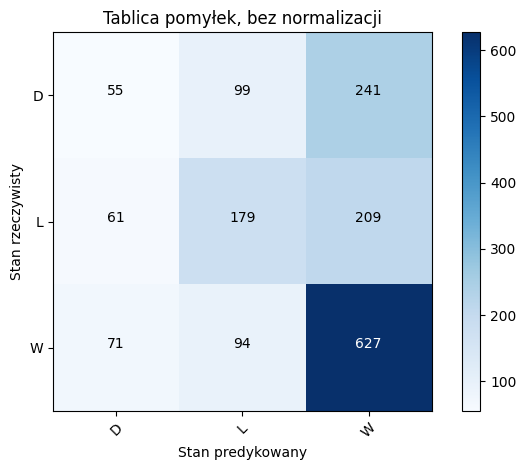

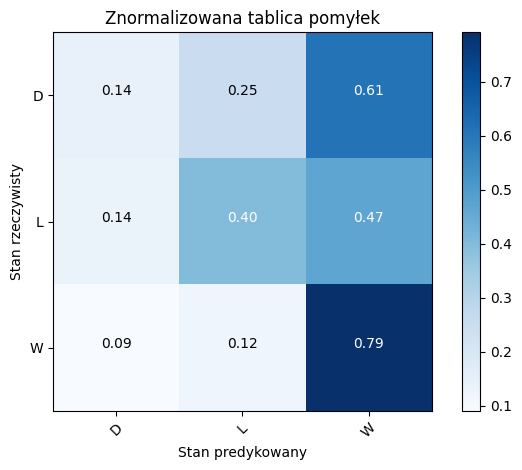

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Stan rzeczywisty')
    plt.xlabel('Stan predykowany')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = y.unique()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Tablica pomyłek, bez normalizacji')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Znormalizowana tablica pomyłek')

plt.show()

In [20]:
bet = 20
earnings = 0

earnings = earnings + X_test[(y_pred == y_test) & (y_pred == 'W')]['B365H'].sum() * bet
earnings = earnings + X_test[(y_pred == y_test) & (y_pred == 'L')]['B365A'].sum() * bet
earnings = earnings + X_test[(y_pred == y_test) & (y_pred == 'D')]['B365D'].sum() * bet

earnings = earnings - len(X_test) * bet

print("Straciłeś " + str(np.round(earnings, 2)) + "zł !")

Straciłeś -1030.2zł !
